In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

# 2 Data Preparation

In [4]:
df = pd.read_csv("housing.csv")

In [5]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


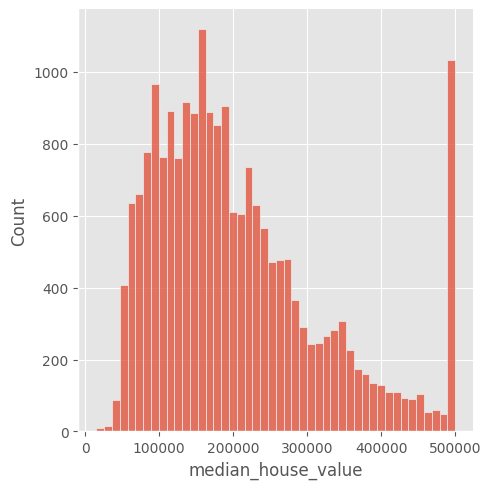

In [7]:
sns.displot(df['median_house_value'])

## 2.2 Subset of data

### Only '<1H OCEAN' OR 'INLAND'

In [8]:
df = df[(df['ocean_proximity'] == '<1H OCEAN') | (df['ocean_proximity']=='INLAND')]

In [9]:
len(df.columns)

10

### Certain columns - excluding ocean_proximity

In [10]:
df = df[['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']]

# Q1

There's one feature with missing values. What is it?

* `total_rooms`
* `total_bedrooms` ✅
* `population`
* `households`

Answer - `total bedrooms`

In [11]:
df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

# Q2

What's the median (50% percentile) for variable `'population'`?

- 995
- 1095
- 1195 ✅
- 1295

Answer: `1195`

 Mean population -> 1466.3172053292535
 Median population -> 1195.0


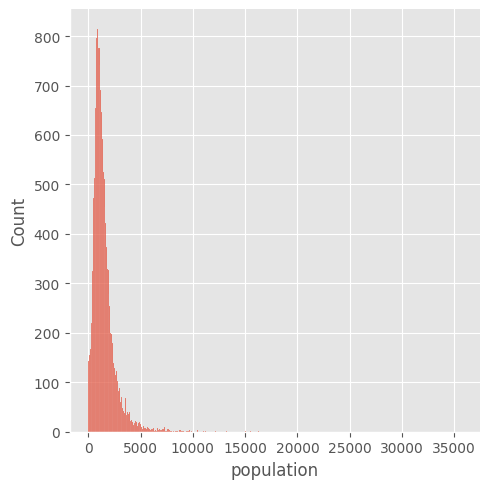

In [12]:
print(f" Mean population -> {df['population'].mean()}")

print(f" Median population -> {df['population'].median()}")

sns.displot(df['population']);



## 3 Prepare and split the dataset

In [13]:
#shuffle the dataset

n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

idx = np.arange(n)

#setting seed and shuffle idx
np.random.seed(42)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]
df_shuffled


,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
19963,36.23,-119.14,22.0,2935.0,523.0,1927.0,530.0,2.5875,70400.0
5929,34.12,-117.79,16.0,2426.0,426.0,1319.0,446.0,4.8125,224500.0
11377,33.68,-117.97,26.0,3653.0,568.0,1930.0,585.0,5.7301,260900.0
6443,34.10,-118.03,32.0,2668.0,609.0,1512.0,541.0,2.9422,233100.0
17546,37.34,-121.87,39.0,2479.0,541.0,1990.0,506.0,2.4306,289100.0
...,...,...,...,...,...,...,...,...,...
6651,34.15,-118.14,41.0,1256.0,407.0,855.0,383.0,1.9923,500001.0
17810,37.40,-121.86,19.0,4043.0,764.0,2196.0,708.0,6.1504,268400.0
6850,34.07,-118.15,52.0,1983.0,344.0,887.0,331.0,3.2875,234400.0
2161,36.78,-119.81,37.0,1965.0,364.0,796.0,335.0,3.6250,83400.0


In [14]:
#train, test and validation
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train: n_train + n_val].copy()
df_test = df_shuffled.iloc[n_train + n_val:].copy()

df_train = df_train.reset_index()
df_val = df_val.reset_index()
df_test = df_test.reset_index()

In [15]:
#log transform dependent variable - median_housing_value
y_train_orig = df_train.median_house_value.values
y_test_orig = df_test.median_house_value.values
y_val_orig = df_val.median_house_value.values

y_train = np.log1p(y_train_orig)
y_test = np.log1p(y_test_orig)
y_val = np.log1p(y_val_orig)


In [16]:
del df_train['median_house_value']
del df_test['median_house_value']
del df_val['median_house_value']

# Q3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:

- With 0
- With mean
- Both are equally good ✅

Answer: `Both are equally good` - No difference in RMSE

In [19]:
df_train.total_bedrooms.median()

431.0

In [25]:
def prepare_X(df, fillna_value):
    df = df.fillna(fillna_value)
    X = df.values
    return X

In [26]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [27]:
def rmse(y, y_pred):
    error = (y - y_pred)
    mse = (error**2).mean()
    return np.sqrt(mse)

### training linear regression with mean as missign values

In [38]:
X_mean_train = prepare_X(df_train, fillna_value = df_train.total_bedrooms.mean())
w0 , w = train_linear_regression(X_mean_train, y_train)

In [39]:
X = prepare_X(df_val, fillna_value=df_train.total_bedrooms.mean())
y_pred = w0 + X.dot(w)

In [46]:
# rmse with mean as fillna
round(rmse(y_val, y_pred),2)

0.34

### training linear regression with 0 as missign value in total_bedrooms

In [42]:
X_train = prepare_X(df_train, fillna_value= 0)
w0, w = train_linear_regression(X_train, y_train)

In [43]:
X_val = prepare_X(df_val, fillna_value=0)
y_pred = w0 + X_val.dot(w)

In [47]:
round(rmse(y_val, y_pred),2)

0.34

# Q4
* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0.
* Try different values of `r` from this list: `[0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

Options:

- 0
- 0.000001
- 0.001
- 0.0001